In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import HuberRegressor
import numpy.random as rgt
from dphuber import huberReg
#import tfhuber

In [2]:
# Assuming huberReg is your custom class for noisy Huber regression

def l2_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def run_experiment(n, d, repetitions, eta, epsilon, T, delta, epsilon2=None):
    errors_noisy = []
    errors_ordinary = []
    if epsilon2 is not None:
        errors_noisy2 = []
    
    for _ in range(repetitions):
        # Generate sample data
        X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2, n) +1
        beta0 = np.zeros(d+1)

        # Noisy Huber Regression
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta)
        if epsilon2 is not None:
            noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon2, T=T, delta=delta, eta=eta)
            error_noisy2 = l2_distance(noisy_huber_result2[0][1:], truebeta)
            errors_noisy2.append(error_noisy2)
        error_noisy = l2_distance(noisy_huber_result[0][1:], truebeta)  # Assuming the first return value is the regression result
        errors_noisy.append(error_noisy)

        # Ordinary Huber Regression
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        error_ordinary = l2_distance(ordinary_huber_coefficients, truebeta)
        errors_ordinary.append(error_ordinary)
        #error_between = l2_distance(ordinary_huber_coefficients,noisy_huber_result[0][1:])
        #errors_between.append(error_between)
    if epsilon2 is not None:
        return np.mean(errors_noisy),np.mean(errors_noisy2),np.mean(errors_ordinary)
    else:
        return np.mean(errors_noisy), np.mean(errors_ordinary)

In [4]:
!pip install tfhuber

In [3]:
import tfHuber as tf

## Lowdim

In [ ]:
# Parameters
d = 5
eta = 1
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(2000, 30000, 500))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ordinary = []
mean_errors_noisy2 = []
for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(d+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        # Noisy Huber Regression2
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon2, T=T, delta=delta, eta=eta)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][1:], truebeta))
        #Ordinary Huber
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
    mean_errors_ordinary.append(np.mean(errors_ord))


        

In [ ]:
plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
n, d = 1000, 7
X = np.random.randn(n, d)
true_beta = np.zeros(d)
true_beta[:5] = np.random.randn(5)  # Sparse true coefficients
true_beta = true_beta/np.linalg.norm(true_beta)
Y = X.dot(true_beta) + np.random.randn(n)

In [ ]:
reg = huberReg(X,Y)

In [ ]:
eta = 1
delta = 0.001
T=int(np.log(1000))
epsilon = 0.5

# Highdim

In [ ]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy2 = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_huber_regression2 = huberReg(X, Y,intercept=False)
        noisy_huber_result2 = noisy_huber_regression2.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy2, label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_n01.png', dpi=300)
plt.show()

## comparison with DP-ls

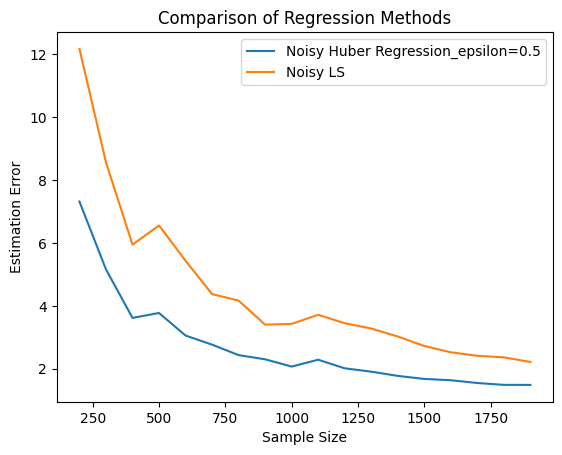

In [9]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy_ls = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy_ls = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls.append(l2_distance(noisy_ls_result[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy_ls.append(np.mean(errors_noisy_ls))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy_ls, label='Noisy LS')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_n01_lscomparison.png', dpi=300)
plt.show()

## Heavy tail

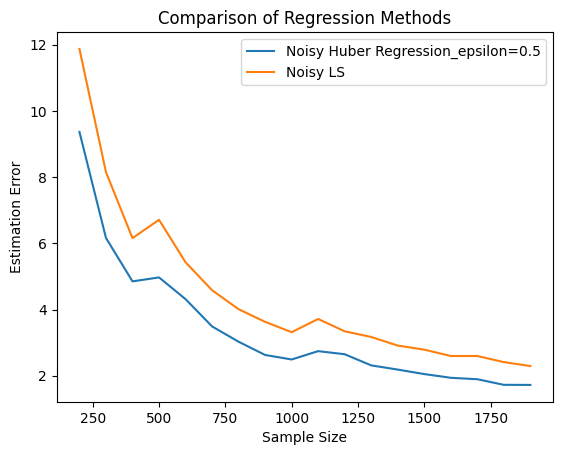

In [10]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy_ls = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy_ls = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(1.5, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls.append(l2_distance(noisy_ls_result[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy_ls.append(np.mean(errors_noisy_ls))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy_ls, label='Noisy LS')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_t15.png', dpi=300)
plt.show()

## Comparison with ord huber

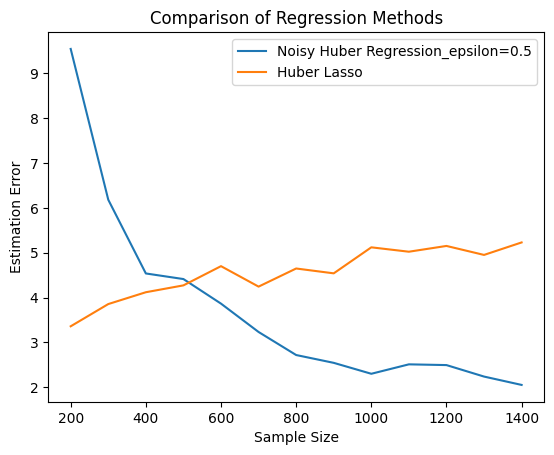

In [26]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        ord_huber = huberReg(X, Y, intercept=False)
        ord_result = ord_huber.l1huber()
        errors_ord.append(l2_distance(ord_result['beta'][:], truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Huber Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_high_t2.png', dpi=300)
plt.show()

In [49]:
n=500
X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
#X = rgt.normal(0, 1, size=(n, n))
truebeta = np.zeros(n)
#truebeta[:20] = np.random.randn(20)
truebeta[:5] = [1,2,3,4,5]
#truebeta /= np.linalg.norm(truebeta)
#Y = X.dot(truebeta) + rgt.standard_t(2, n)
Y = X.dot(truebeta) +np.random.normal(0, 1, n)

In [43]:
lambda_max = np.max(np.abs(Y.dot(X))/n)
lambda_min = 0.01 * lambda_max
Lambda =  math.exp(0.7 * math.log(lambda_max) + 0.3 * math.log(lambda_min))

In [44]:
Lambda

0.0008097476114891085

In [11]:
from sklearn import linear_model

In [45]:
clf = linear_model.Lasso(alpha=Lambda)

In [46]:
clf.fit(X,Y)

Lasso(alpha=0.0008097476114891085)

In [47]:
clf.coef_

array([ 1.90740713,  0.        ,  0.        ,  2.80750283, -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  1.75825198,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.41767209, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.49150687,  0.        , -0.        , -1.08179438,
       -1.7327835 ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.74636487, -0.        ,  0.        ,
        0.        ,  0.        ,  1.98198141,  2.14091704,  0.        ,
       -0.        ,  0.        , -0.07506738,  0.62793085, -1.75288797,
        1.18896112,  0.        , -0.        , -0.64410317, -1.31148525,
       -0.5467263 , -0.        ,  0.        ,  0.        ,  0.58762285,
       -0.        , -1.16888525, -0.62248502, -0.        ,  0.        ,
       -0.38512429, -2.41745996, -0.        , -0.        ,  0.16

In [50]:
ord_huber = huberReg(X, Y, intercept=False)
#beta0 = np.zeros(n)
ord_result = ord_huber.l1huber(standardize=False,max_iter=5000)

In [51]:
ord_result

{'beta': array([-0.        , -0.        ,  0.78831914,  1.11940949,  1.8864839 ,
        -0.        , -1.28234742,  0.        , -0.        ,  0.        ,
        -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        -0.03959904, -0.        ,  0.        , -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
         0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        , -0.87132951,  0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        , -0.9444219 ,  0.        ,
         0.        ,  0.        ,  0.2842026 ,  0.        ,  0.        ,
         0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.      

In [48]:
l2_distance(truebeta, clf.coef_)

17.894377746109

In [52]:
l2_distance(truebeta,ord_result['beta'])

9.632639053209386

## LS and Huber comparison (LASSO)

In [ ]:
repetitions = 100
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_huberlasso = []
mean_errors_lasso = []

for n in sample_sizes:
    errors_huberlasso = []
    errors_lasso = []
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # HuberLasso
        huberlasso = huberReg(X, Y,intercept=False)
        huberlasso_result = huberlasso.l1huber(standardize=False)
        errors_huberlasso.append(l2_distance(huberlasso_result['beta'], truebeta))

        # Noisy Huber Regression2
        lasso = linear_model.Lasso()
        lasso.fit(X,Y)
        errors_lasso.append(l2_distance(lasso.coef_, truebeta))
        
    mean_errors_huberlasso.append(np.mean(errors_huberlasso))
    mean_errors_lasso.append(np.mean(errors_lasso))
   
    

plt.plot(sample_sizes, mean_errors_huberlasso, label='Huber Lasso')
plt.plot(sample_sizes, mean_errors_lasso, label='Lasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_high_t2.png', dpi=300)
plt.show()

In [ ]:
lambda_max = np.max(np.abs(self.Y.dot(X)))/self.n
lambda_min = 0.01 * lambda_max
Lambda =  math.exp(0.7 * math.log(lambda_max) + 0.3 * math.log(lambda_min))

In [35]:
ord_huber = huberReg(X, Y)
#beta0 = np.zeros(n)
ord_result = ord_huber.l1huber(tol=1e-8, phi = 0.001, standardize=True)

In [42]:
l2_distance(truebeta, clf.coef_)

1.7717311862258707

## LS and Huber comparison

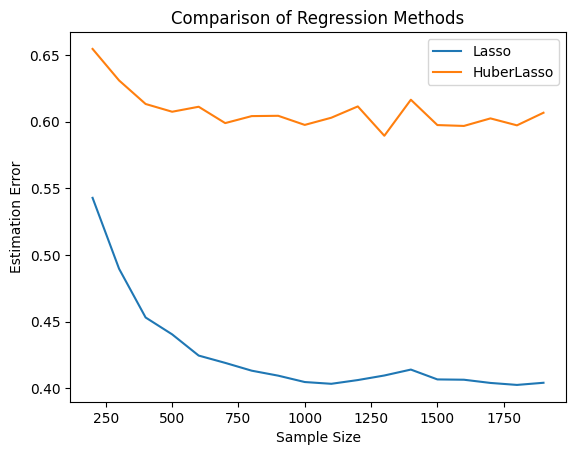

In [44]:
# Parameters

repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_huberlasso = []
mean_errors_lasso = []

for n in sample_sizes:
    errors_huberlasso = []
    errors_lasso = []

    for m in range(repetitions):
        X = rgt.normal(0, 1, size=(n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        clf=linear_model.Lasso(alpha=0.1)
        clf.fit(X,Y)
        errors_lasso.append(l2_distance(clf.coef_, truebeta))

        # huberlasso
        ord_huber = huberReg(X, Y,intercept=False)
        ord_result = ord_result = ord_huber.l1huber()
        errors_huberlasso.append(l2_distance(ord_result['beta'], truebeta))
        
    mean_errors_lasso.append(np.mean(errors_lasso))
    mean_errors_huberlasso.append(np.mean(errors_huberlasso))
   
    

plt.plot(sample_sizes, mean_errors_lasso, label='Lasso')
plt.plot(sample_sizes, mean_errors_huberlasso, label='HuberLasso')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(1.5*np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.1
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=20)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.7
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 1.5
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.5
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy2 = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=10, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_huber_regression2 = huberReg(X, Y,intercept=False)
        noisy_huber_result2 = noisy_huber_regression2.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=delta, eta=eta, s=10, 
                                                                           standardize=False)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()